# Data Analytics Capstone Notebook

### Import Libraries

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

### Import Data Source

In [6]:
df = pd.read_csv('bodyfat.csv')

### Data Overview
- The data set has 15 features. 
- The data set had 252 instances.
- The data types included are float and int.
- There are no missing values. 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [10]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [12]:
df.describe()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,class
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762,19.150794
std,0.019031,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585,8.368740
min,0.995000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000,0.000000
25%,1.041400,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000,12.475000
50%,1.054900,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000,19.200000
75%,1.070400,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000,25.300000
max,1.108900,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000,47.500000


In [87]:
df['Height (m)'] = df['Height'] * 0.0254 # 1 inch = 0.0254 meters
df['Weight (kg)'] = df['Weight'] * 0.453592 # 1 pound = 0.453592 kilograms
df['BMI'] = df['Weight (kg)']/(df['Height (m)'] ** 2)
df.head(5)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Height (m),Weight (kg),BMI,BMI Body Fat
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,1.72085,69.966566,23.626779,19.052135
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,1.83515,78.584814,23.334338,18.701206
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,1.68275,69.853168,24.668737,20.302484
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,1.83515,83.801122,24.883227,20.559872
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,1.80975,83.574326,25.517358,21.320830


In [93]:
def bmi_body_fat_estimate(bmi):
    bmi_body_fat = (1.2 * bmi) + (0.23 * 30) - 10.8 * 1 -5.4
    return bmi_body_fat

df['BMI Body Fat'] = df['BMI'].apply(bmi_body_fat_estimate)
df.head(10)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Height (m),Weight (kg),BMI,BMI Body Fat
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,1.72085,69.966566,23.626779,19.052135
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,1.83515,78.584814,23.334338,18.701206
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,1.68275,69.853168,24.668737,20.302484
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,1.83515,83.801122,24.883227,20.559872
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,1.80975,83.574326,25.517358,21.320830
5,1.0502,20.9,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8,1.89865,95.367718,26.455231,22.446278
6,1.0549,19.2,26,181.00,69.75,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7,1.77165,82.100152,26.157010,22.088412
7,1.0704,12.4,25,176.00,72.50,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8,1.84150,79.832192,23.541526,18.949831
8,1.0900,4.1,25,191.00,74.00,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2,1.87960,86.636072,24.522677,20.127213
9,1.0722,11.7,23,198.25,73.50,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2,1.86690,89.924614,25.800996,21.661195


In [102]:
df['Height (cm)'] = df['Height'] * 2.54 # 1 inch = 2.54 cm

def navy_body_fat(row):
    return 86.010 * np.log10(row['Abdomen'] - row['Neck']) - 70.041 * np.log10(row['Height (cm)']) + 36.76

df['Navy Body Fat'] = df.apply(lambda row: navy_body_fat(row), axis=1)
df.head(10)                                                                    

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,...,Ankle,Biceps,Forearm,Wrist,Height (m),Weight (kg),BMI,BMI Body Fat,Height (cm),Navy Body Fat
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,...,21.9,32.0,27.4,17.1,1.72085,69.966566,23.626779,19.052135,172.085,25.540088
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,...,23.4,30.5,28.9,18.2,1.83515,78.584814,23.334338,18.701206,183.515,19.985624
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,...,24.0,28.8,25.2,16.6,1.68275,69.853168,24.668737,20.302484,168.275,29.781311
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,...,22.8,32.4,29.4,18.2,1.83515,83.801122,24.883227,20.559872,183.515,23.583945
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,...,24.0,32.2,27.7,17.7,1.80975,83.574326,25.517358,21.320830,180.975,34.906036
5,1.0502,20.9,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,...,25.6,35.7,30.6,18.8,1.89865,95.367718,26.455231,22.446278,189.865,27.134715
6,1.0549,19.2,26,181.00,69.75,36.4,105.1,90.7,100.3,58.4,...,22.9,31.9,27.8,17.7,1.77165,82.100152,26.157010,22.088412,177.165,28.491495
7,1.0704,12.4,25,176.00,72.50,37.8,99.6,88.5,97.1,60.0,...,23.2,30.5,29.0,18.8,1.84150,79.832192,23.541526,18.949831,184.150,24.752842
8,1.0900,4.1,25,191.00,74.00,38.1,100.9,82.5,99.9,62.9,...,23.8,35.9,31.1,18.2,1.87960,86.636072,24.522677,20.127213,187.960,19.173592
9,1.0722,11.7,23,198.25,73.50,42.1,99.6,88.6,104.1,63.1,...,25.0,35.6,30.0,19.2,1.86690,89.924614,25.800996,21.661195,186.690,21.106039


In [103]:
df.corr()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,...,Ankle,Biceps,Forearm,Wrist,Height (m),Weight (kg),BMI,BMI Body Fat,Height (cm),Navy Body Fat
Density,1.000000,-0.987782,-0.277637,-0.594062,0.097881,-0.472966,-0.682599,-0.798955,-0.609331,-0.553091,...,-0.264890,-0.487109,-0.351648,-0.325716,0.097881,-0.594062,-0.364443,-0.364443,0.097881,-0.825445
BodyFat,-0.987782,1.000000,0.291458,0.612414,-0.089495,0.490592,0.702620,0.813432,0.625201,0.559608,...,0.265970,0.493271,0.361387,0.346575,-0.089495,0.612414,0.371395,0.371395,-0.089495,0.834259
Age,-0.277637,0.291458,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,...,-0.105058,-0.041162,-0.085056,0.213531,-0.171645,-0.012746,0.039902,0.039902,-0.171645,0.282650
Weight,-0.594062,0.612414,-0.012746,1.000000,0.308279,0.830716,0.894191,0.887995,0.940884,0.868694,...,0.613685,0.800416,0.630301,0.729775,0.308279,1.000000,0.390620,0.390620,0.308279,0.707702
Height,0.097881,-0.089495,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,...,0.264744,0.207816,0.228649,0.322065,1.000000,0.308279,-0.637982,-0.637982,1.000000,-0.260280
Neck,-0.472966,0.490592,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,...,0.477892,0.731146,0.623660,0.744826,0.253710,0.830716,0.266298,0.266298,0.253710,0.523328
Chest,-0.682599,0.702620,0.176450,0.894191,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,...,0.482988,0.727907,0.580173,0.660162,0.134892,0.894191,0.383368,0.383368,0.134892,0.797562
Abdomen,-0.798955,0.813432,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,...,0.453223,0.684983,0.503316,0.619832,0.087813,0.887995,0.414947,0.414947,0.087813,0.915265
Hip,-0.609331,0.625201,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,...,0.558387,0.739273,0.545014,0.630090,0.170394,0.940884,0.462012,0.462012,0.170394,0.752014
Thigh,-0.553091,0.559608,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,...,0.539797,0.761477,0.566842,0.558685,0.148436,0.868694,0.432751,0.432751,0.148436,0.658624


array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Weight', ylabel='Age'>,
        <Axes: xlabel='Neck', ylabel='Age'>,
        <Axes: xlabel='Thigh', ylabel='Age'>,
        <Axes: xlabel='Knee', ylabel='Age'>,
        <Axes: xlabel='Ankle', ylabel='Age'>,
        <Axes: xlabel='Biceps', ylabel='Age'>,
        <Axes: xlabel='Forearm', ylabel='Age'>,
        <Axes: xlabel='Wrist', ylabel='Age'>,
        <Axes: xlabel='BodyFat', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Weight'>,
        <Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Neck', ylabel='Weight'>,
        <Axes: xlabel='Thigh', ylabel='Weight'>,
        <Axes: xlabel='Knee', ylabel='Weight'>,
        <Axes: xlabel='Ankle', ylabel='Weight'>,
        <Axes: xlabel='Biceps', ylabel='Weight'>,
        <Axes: xlabel='Forearm', ylabel='Weight'>,
        <Axes: xlabel='Wrist', ylabel='Weight'>,
        <Axes: xlabel='BodyFat', ylabel='Weight'>],
       [<Axes: xlabel='Age', ylabel='Neck'>,

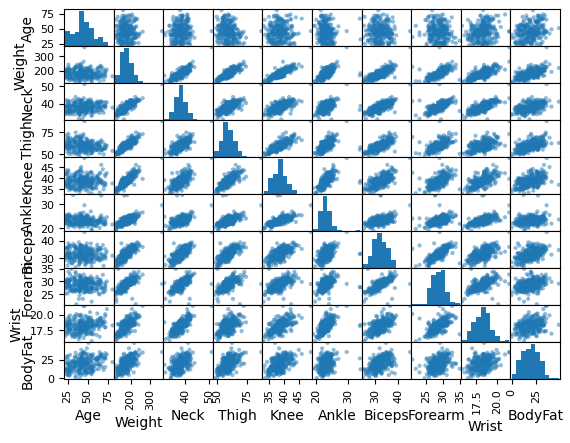

In [119]:
from pandas.plotting import scatter_matrix
attributes = ['Weight', 'Neck', 'Thigh', 'Knee', 'Ankle',  'Biceps', 'Forearm', 'Wrist', 'BodyFat']
scatter_matrix(df[attributes])

array([[<Axes: xlabel='Density', ylabel='Density'>,
        <Axes: xlabel='Height', ylabel='Density'>,
        <Axes: xlabel='Chest', ylabel='Density'>,
        <Axes: xlabel='Abdomen', ylabel='Density'>,
        <Axes: xlabel='Hip', ylabel='Density'>,
        <Axes: xlabel='BodyFat', ylabel='Density'>],
       [<Axes: xlabel='Density', ylabel='Height'>,
        <Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='Chest', ylabel='Height'>,
        <Axes: xlabel='Abdomen', ylabel='Height'>,
        <Axes: xlabel='Hip', ylabel='Height'>,
        <Axes: xlabel='BodyFat', ylabel='Height'>],
       [<Axes: xlabel='Density', ylabel='Chest'>,
        <Axes: xlabel='Height', ylabel='Chest'>,
        <Axes: xlabel='Chest', ylabel='Chest'>,
        <Axes: xlabel='Abdomen', ylabel='Chest'>,
        <Axes: xlabel='Hip', ylabel='Chest'>,
        <Axes: xlabel='BodyFat', ylabel='Chest'>],
       [<Axes: xlabel='Density', ylabel='Abdomen'>,
        <Axes: xlabel='Height', ylabel='Abdomen'

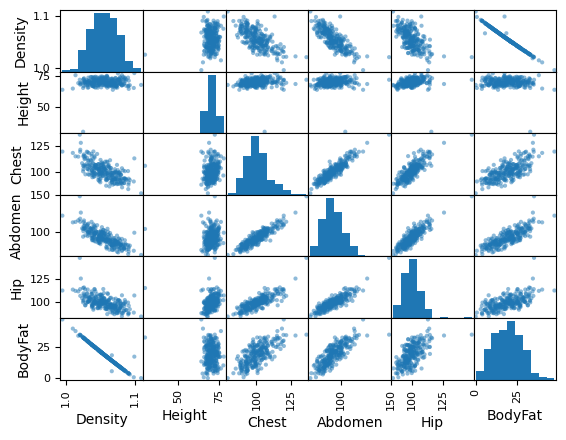

In [120]:
from pandas.plotting import scatter_matrix
attributes = ['Density', 'Height', 'Chest', 'Abdomen', 'Hip','BodyFat']
scatter_matrix(df[attributes])

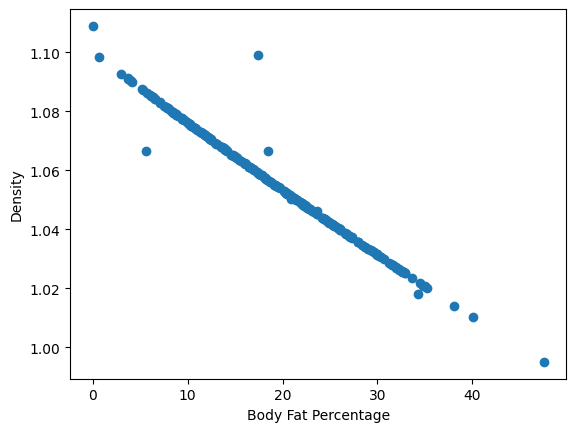

In [117]:
density = df['Density']
body_fat = df['BodyFat']

plt.scatter(body_fat, density)
plt.xlabel('Body Fat Percentage')
plt.ylabel('Density')
plt.show()

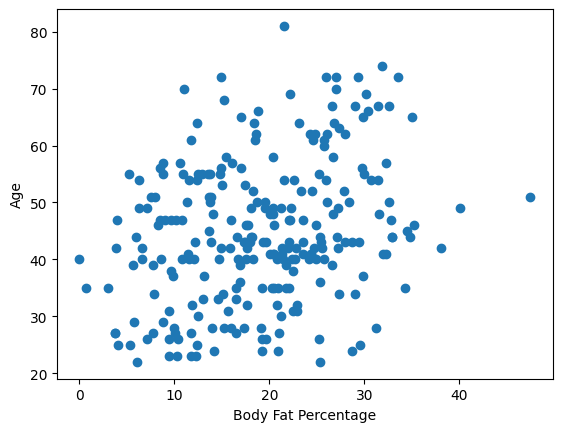

In [121]:
age = df['Age']
body_fat = df['BodyFat']

plt.scatter(body_fat, age)
plt.xlabel('Body Fat Percentage')
plt.ylabel('Age')
plt.show()

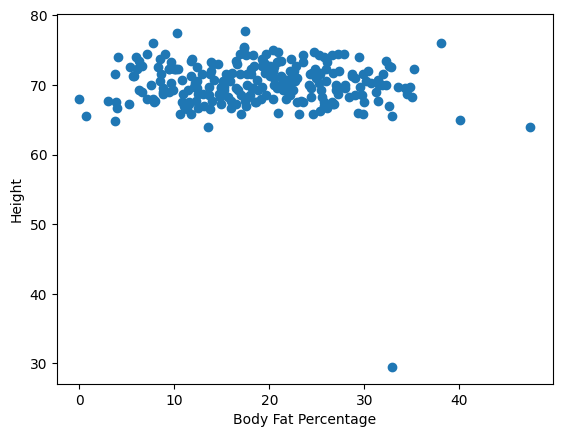

In [116]:
height = df['Height']
body_fat = df['BodyFat']

plt.scatter(body_fat, height)
plt.xlabel('Body Fat Percentage')
plt.ylabel('Height')
plt.show()

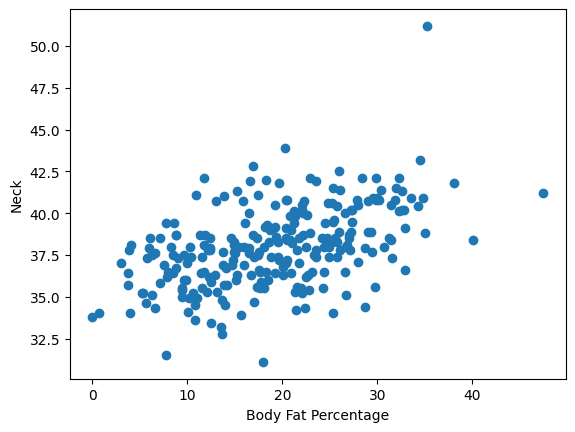

In [112]:
neck = df['Neck']
body_fat = df['BodyFat']

plt.scatter(body_fat, neck)
plt.xlabel('Body Fat Percentage')
plt.ylabel('Neck')
plt.show()

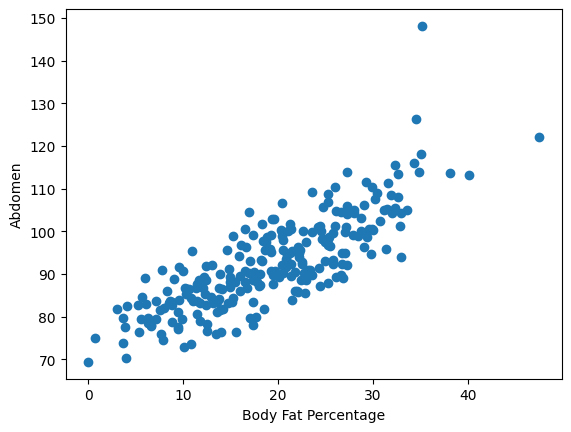

In [113]:
abdomen = df['Abdomen']
body_fat = df['BodyFat']

plt.scatter(body_fat, abdomen)
plt.xlabel('Body Fat Percentage')
plt.ylabel('Abdomen')
plt.show()

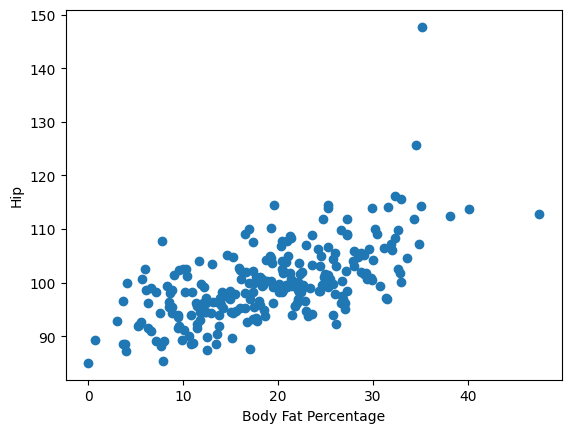

In [114]:
abdomen = df['Hip']
body_fat = df['BodyFat']

plt.scatter(body_fat, hip)
plt.xlabel('Body Fat Percentage')
plt.ylabel('Hip')
plt.show()